<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/Copy_of_Copy_of_fft_r1_model_single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-normal-n-0-3-r1.csv?token=AKVFSOEVHMKCJQ65CFLMYI26ZJG32')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,1
1,84,4,2,1,1,4,3,9,3,3,24,8,3,5,2,0.400000,12,1,2,2,2,4,8,1,4,12,3,27,9,1
2,216,2,4,1,1,4,3,9,0,0,22,6,6,3,1,0.333333,8,1,1,1,1,1,8,1,4,24,3,27,9,1
3,342,2,4,1,1,4,3,9,0,0,23,7,8,4,1,0.250000,8,1,1,1,1,1,8,1,4,32,3,27,9,1
4,388,1,2,1,1,4,3,9,3,3,21,5,9,3,2,0.666667,12,1,1,1,1,1,2,1,4,36,3,27,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56912,3268816,4,2,6,2,2,3,9,18,2,20,4,20042,3,1,0.333333,15,5,1,5,5,25,8,12,24,481008,18,27,54,1
56913,3268823,4,2,6,3,2,3,9,18,2,20,4,20042,3,1,0.333333,22,4,2,5,8,40,8,18,36,721512,18,27,54,1
56914,3268830,4,2,6,4,2,3,9,18,2,20,4,20042,3,1,0.333333,29,3,3,5,9,45,8,24,48,962016,18,27,54,1
56915,3268837,4,2,6,5,3,3,9,18,2,20,4,20042,3,1,0.333333,36,2,4,5,8,40,8,30,90,1803780,18,27,54,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-1-r1.csv?token=AKVFSODBXB5IUCFE6ERSQMC6ZJG32')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-6-r1.csv?token=AKVFSOGMU5OD4YODOXGQVU26ZJG36')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-9-r1.csv?token=AKVFSOFB72UAJ6OIWSC6RXS6ZJXTK')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-14-r1.csv?token=AKVFSOG5FLJP4JXI2E2QCES6ZJG64')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(127850, 30)
(69441, 30)
(69896, 30)
(69041, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,1,1,23,7,2,3,0,0.000000,4,8,1,8,8,64,0,1,4,8,3,27,9,0
1,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,1
2,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,7,2,8,14,112,8,1,4,4,3,27,9,0
3,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,0
4,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393140,3272029,4,2,6,2,2,3,9,18,2,20,4,30088,3,1,0.333333,15,5,2,6,10,60,8,12,24,722112,18,27,54,0
393141,3272036,4,2,6,3,2,3,9,18,2,20,4,30088,3,1,0.333333,22,4,3,6,12,72,8,18,36,1083168,18,27,54,0
393142,3272043,4,2,6,4,2,3,9,18,2,20,4,30088,3,1,0.333333,29,3,4,6,12,72,8,24,48,1444224,18,27,54,0
393143,3272050,4,2,6,5,3,3,9,18,2,20,4,30088,3,1,0.333333,36,2,5,6,10,60,8,30,90,2707920,18,27,54,0


In [0]:
df.shape

(393145, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-13-r1.csv?token=AKVFSOBJ6YDCG2K3JNTO6O26ZJJBG')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-2-r1.csv?token=AKVFSOCVXJ5DH3YNIWVYOHS6ZJ52G')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-5-r1.csv?token=AKVFSOFBHZKQTCCGUNRVDUC6ZJ52K')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-10-r1.csv?token=AKVFSOEN6ZF5ZVFFYY6NGRC6ZJ52S')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-12-r1.csv?token=AKVFSOBETR5ER5HO2377XD26ZJ52W')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r1/2-fft-malicious-n-0-3-m-15-r1.csv?token=AKVFSOHJX2J2JISMXV7YH626ZJ526')
df5.shape

(70287, 30)

In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9,0
1,84,4,2,1,1,4,3,9,3,3,24,8,4,5,2,0.400000,12,1,2,2,2,4,8,1,4,16,3,27,9,0
2,238,2,4,1,1,4,3,9,0,0,22,6,9,3,1,0.333333,8,1,1,1,1,1,8,1,4,36,3,27,9,0
3,365,2,4,1,1,4,3,9,0,0,23,7,12,4,1,0.250000,8,1,1,1,1,1,8,1,4,48,3,27,9,0
4,386,1,2,1,1,4,3,9,3,3,21,5,13,3,2,0.666667,12,1,1,1,1,1,2,1,4,52,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70282,3270654,2,4,1,1,4,3,10,0,0,22,6,30075,3,1,0.333333,36,1,6,6,6,36,8,1,4,120300,3,30,9,0
70283,3270850,2,4,5,1,1,3,9,0,0,27,11,30076,5,1,0.200000,8,1,1,1,1,1,8,5,5,150380,15,27,45,0
70284,3270857,2,4,5,2,2,3,9,0,0,27,11,30076,5,1,0.200000,15,3,1,3,3,9,8,10,20,601520,15,27,45,0
70285,3270864,2,4,5,3,2,3,9,0,0,27,11,30076,5,1,0.200000,22,2,2,3,4,12,8,15,30,902280,15,27,45,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.225223,0.226431,0.012991,-0.019561,-0.389106,-0.287444,-0.019989,0.233994,-0.311444,-0.583705,0.063922,-0.081805,0.075636,-0.004125,0.015961,0.011228,0.491411,0.134633,0.103740,0.061103,0.060189,-0.353338,-0.148773,0.044515
inport,-0.225223,1.000000,-0.121909,0.028431,-0.042810,-0.202403,-0.364958,0.017616,0.309919,0.124995,0.165234,0.144343,-0.062471,-0.190693,-0.169301,-0.143348,-0.121228,0.616192,-0.017014,-0.028665,-0.009162,-0.199285,-0.275837,-0.246755,0.134980
cache_coherence_type,0.226431,-0.121909,1.000000,0.354372,-0.533604,-0.115018,-0.177074,0.001204,-0.056410,-0.100093,-0.131124,-0.424265,0.064784,-0.044748,0.013399,0.026635,0.023411,0.038907,0.541776,0.432271,0.305962,0.915437,-0.143795,0.615329,-0.003163
flit_id,0.012991,0.028431,0.354372,1.000000,-0.032867,0.077357,-0.007498,0.017771,0.045541,0.017108,-0.007478,0.503386,0.014393,0.042730,0.038200,0.056202,0.035300,0.024451,0.966951,0.930168,0.686808,0.372260,0.042628,0.311785,-0.001539
flit_type,-0.019561,-0.042810,-0.533604,-0.032867,1.000000,-0.116481,0.011291,-0.026759,-0.068574,-0.025761,0.011261,0.554750,-0.141893,0.180062,0.025526,-0.009531,-0.008041,-0.036817,-0.127392,0.127672,0.089595,-0.560539,-0.064189,-0.469477,0.002318
vnet,-0.389106,-0.202403,-0.115018,0.077357,-0.116481,1.000000,0.921419,0.024588,-0.053378,0.473065,0.457672,-0.117846,0.080918,0.064733,0.097403,0.066909,0.046159,-0.304012,-0.026759,-0.032293,-0.012309,0.294499,0.986125,0.712265,-0.110590
vc,-0.287444,-0.364958,-0.177074,-0.007498,0.011291,0.921419,1.000000,0.015277,-0.150046,0.290196,0.290556,-0.105885,0.074235,0.142287,0.144797,0.108341,0.083808,-0.410872,-0.102294,-0.079661,-0.054123,0.202961,0.973139,0.606059,-0.123674
traversal_id,-0.019989,0.017616,0.001204,0.017771,-0.026759,0.024588,0.015277,1.000000,0.085406,0.020119,-0.024426,0.018826,0.078749,0.078812,0.105368,0.076560,0.056862,0.015829,0.008365,0.004301,0.531638,0.011120,0.021094,0.020362,-0.203727
hop_count,0.233994,0.309919,-0.056410,0.045541,-0.068574,-0.053378,-0.150046,0.085406,1.000000,0.347046,-0.156345,0.188001,-0.118277,-0.091180,-0.140073,-0.124847,-0.117383,0.576771,0.025250,0.002970,0.046242,-0.075894,-0.095728,-0.082216,0.046874
current_hop,-0.311444,0.124995,-0.100093,0.017108,-0.025761,0.473065,0.290196,0.020119,0.347046,1.000000,0.785825,0.175553,0.014214,-0.093561,-0.053063,-0.060778,-0.055537,0.125960,-0.048541,-0.040480,-0.018381,0.095369,0.404257,0.304668,-0.018147


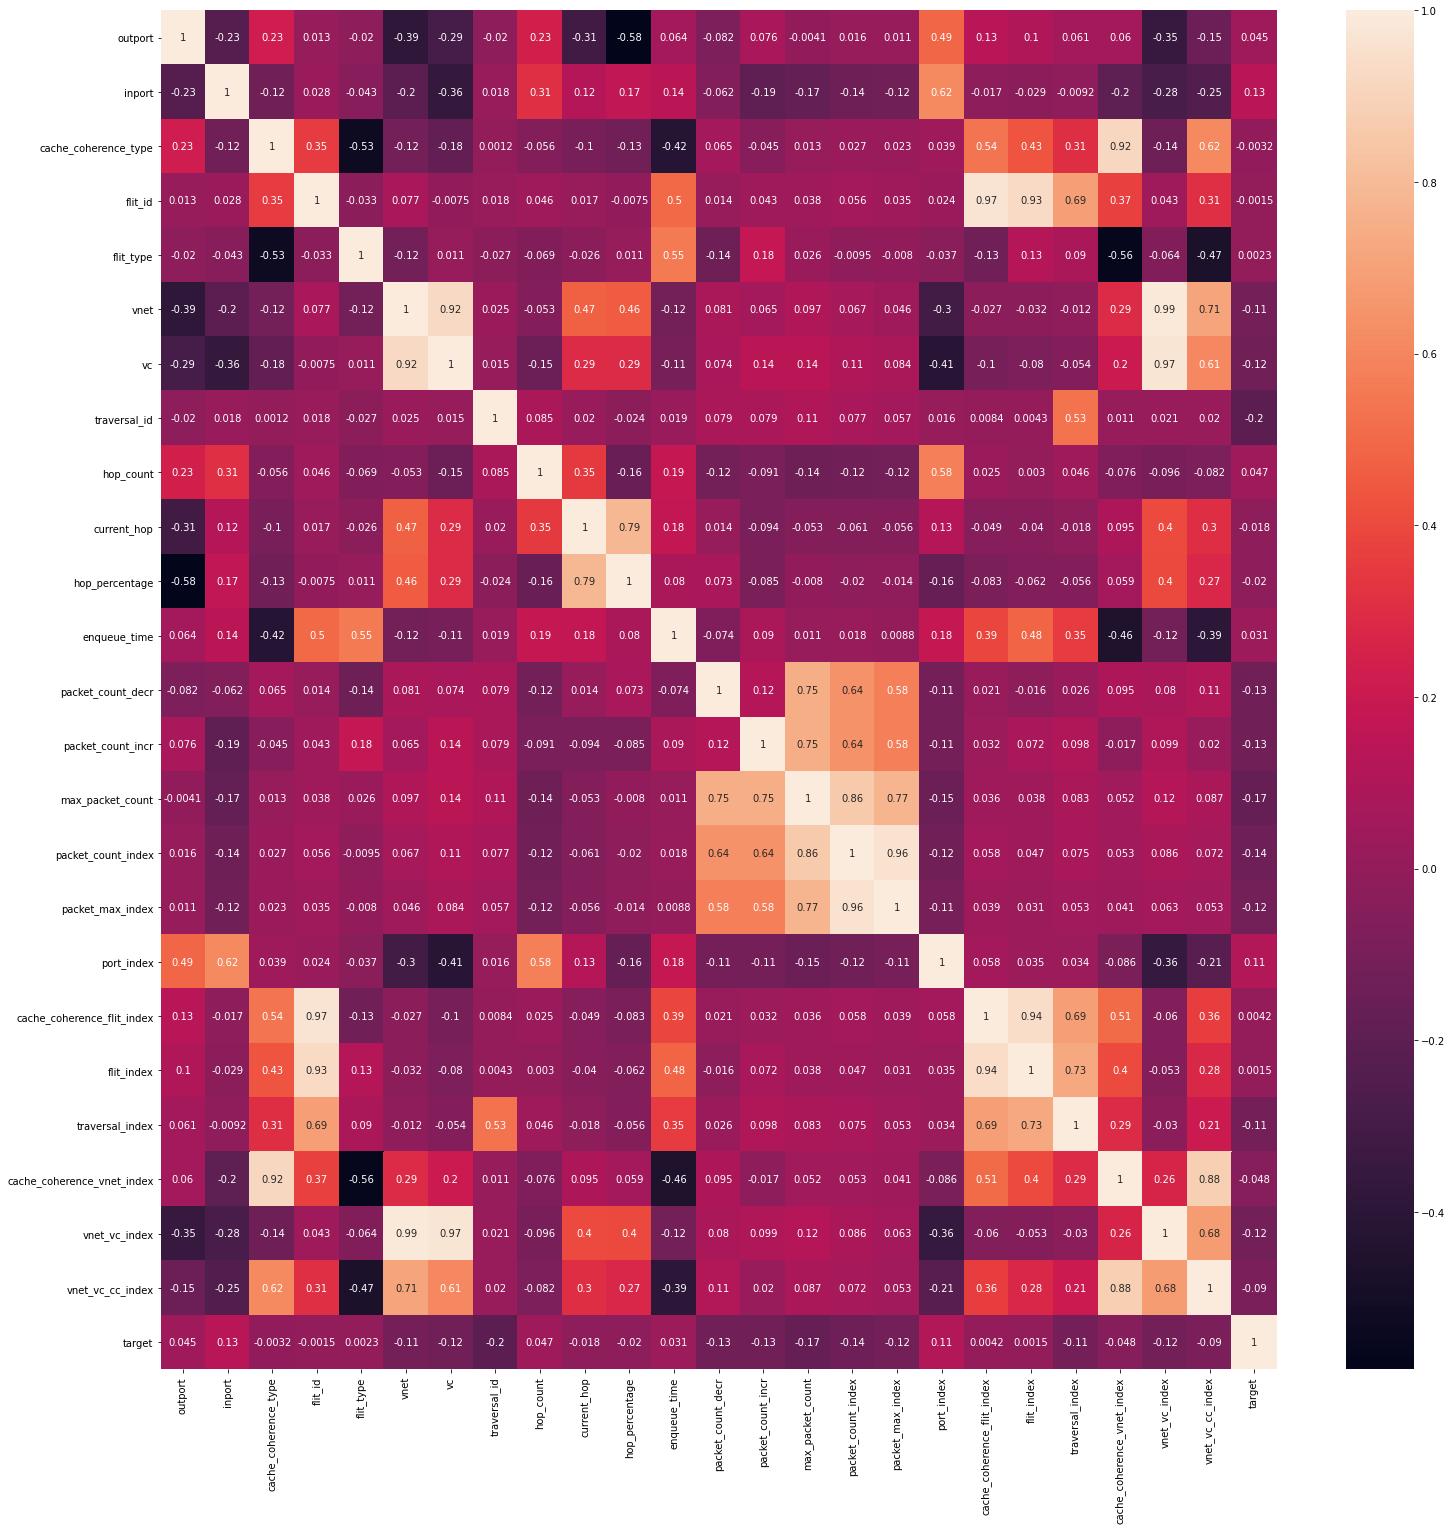

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,2,3,0,0.000000,4,8,1,8,8,64,0,1,4,8,3,27,9
1,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
2,2,4,1,1,4,3,9,1,4,1,0.250000,8,7,2,8,14,112,8,1,4,4,3,27,9
3,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
4,2,4,1,1,4,3,9,1,4,1,0.250000,8,2,1,2,2,4,8,1,4,4,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393140,4,2,6,2,2,3,9,30088,3,1,0.333333,15,5,2,6,10,60,8,12,24,722112,18,27,54
393141,4,2,6,3,2,3,9,30088,3,1,0.333333,22,4,3,6,12,72,8,18,36,1083168,18,27,54
393142,4,2,6,4,2,3,9,30088,3,1,0.333333,29,3,4,6,12,72,8,24,48,1444224,18,27,54
393143,4,2,6,5,3,3,9,30088,3,1,0.333333,36,2,5,6,10,60,8,30,90,2707920,18,27,54


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.500000,0.0,0.000000,0.000000,0.205882,0.000000,0.205882,0.021672,0.005556,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.060606,0.029412,0.000000,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.060606,0.176471,0.029412,0.205882,0.040248,0.009789,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.060606,0.029412,0.000000,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.2,0.250000,0.060606,0.029412,0.000000,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393140,1.0,0.5,0.833333,0.25,0.333333,0.0,0.000,0.999967,0.500000,0.2,0.333333,0.166667,0.117647,0.029412,0.147059,0.027864,0.005203,1.0,0.379310,0.232558,0.266666,0.833333,0.000000,0.494505
393141,1.0,0.5,0.833333,0.50,0.333333,0.0,0.000,0.999967,0.500000,0.2,0.333333,0.272727,0.088235,0.058824,0.147059,0.034056,0.006262,1.0,0.586207,0.372093,0.399999,0.833333,0.000000,0.494505
393142,1.0,0.5,0.833333,0.75,0.333333,0.0,0.000,0.999967,0.500000,0.2,0.333333,0.378788,0.058824,0.088235,0.147059,0.034056,0.006262,1.0,0.793103,0.511628,0.533333,0.833333,0.000000,0.494505
393143,1.0,0.5,0.833333,1.00,0.666667,0.0,0.000,0.999967,0.500000,0.2,0.333333,0.484848,0.029412,0.117647,0.147059,0.027864,0.005203,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505


In [0]:
train_X[train_X.duplicated()].shape

(5157, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.333333,0.250000,0.062500,0.034483,0.000000,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.666667,0.400000,0.125000,0.000000,0.034483,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.333333,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.333333,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000399,0.4,0.666667,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70282,0.50,1.0,0.000000,0.00,1.000000,0.0,0.333333,0.999967,0.4,0.333333,0.333333,0.500000,0.000000,0.172414,0.172414,0.020921,0.004862,1.00,0.000000,0.000000,0.044449,0.000000,0.333333,0.000000
70283,0.50,1.0,0.666667,0.00,0.000000,0.0,0.000000,1.000000,0.8,0.333333,0.200000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.137931,0.011628,0.055563,0.666667,0.000000,0.666667
70284,0.50,1.0,0.666667,0.25,0.333333,0.0,0.000000,1.000000,0.8,0.333333,0.200000,0.171875,0.068966,0.000000,0.068966,0.008368,0.001111,1.00,0.310345,0.186047,0.222258,0.666667,0.000000,0.666667
70285,0.50,1.0,0.666667,0.50,0.333333,0.0,0.000000,1.000000,0.8,0.333333,0.200000,0.281250,0.034483,0.034483,0.068966,0.012552,0.001528,1.00,0.482759,0.302326,0.333388,0.666667,0.000000,0.666667


In [0]:
test_X[test_X.duplicated()].shape

(56, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(61, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.5,0.250000,0.063492,0.033333,0.000000,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,1.0,0.400000,0.126984,0.000000,0.033333,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,1.0,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000133,0.6,0.5,0.250000,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000
3,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.5,0.333333,0.063492,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
4,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.5,0.250000,0.063492,0.033333,0.000000,0.033333,0.003922,0.000378,1.0,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80882,1.0,0.5,0.833333,0.25,0.333333,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.174603,0.133333,0.033333,0.166667,0.035294,0.007435,1.0,0.379310,0.232558,0.266666,0.833333,0.000000,0.833333
80883,1.0,0.5,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.285714,0.100000,0.066667,0.166667,0.043137,0.008948,1.0,0.586207,0.372093,0.399999,0.833333,0.000000,0.833333
80884,1.0,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.396825,0.066667,0.100000,0.166667,0.043137,0.008948,1.0,0.793103,0.511628,0.533333,0.833333,0.000000,0.833333
80885,1.0,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.507937,0.033333,0.133333,0.166667,0.035294,0.007435,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(40, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.5,0.250000,0.062500,0.035714,0.000000,0.035714,0.004464,0.000460,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,1.0,0.400000,0.125000,0.000000,0.035714,0.035714,0.004464,0.000460,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.5,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.5,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000399,0.4,1.0,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69891,1.00,0.5,0.833333,0.25,0.333333,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.171875,0.000000,0.035714,0.035714,0.004464,0.000460,1.00,0.379310,0.232558,0.266666,0.833333,0.000000,0.833333
69892,1.00,0.5,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.281250,0.107143,0.000000,0.107143,0.013393,0.002299,1.00,0.586207,0.372093,0.399999,0.833333,0.000000,0.833333
69893,1.00,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.390625,0.071429,0.035714,0.107143,0.022321,0.003525,1.00,0.793103,0.511628,0.533333,0.833333,0.000000,0.833333
69894,1.00,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.4,0.5,0.333333,0.500000,0.035714,0.071429,0.107143,0.022321,0.003525,1.00,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(49, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.333333,0.250000,0.062500,0.030303,0.000000,0.030303,0.003279,0.000288,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.666667,0.400000,0.125000,0.000000,0.030303,0.030303,0.003279,0.000288,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.333333,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.333333,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000399,0.4,0.666667,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69036,1.00,0.5,0.833333,0.25,0.333333,0.0,0.000000,0.999967,0.4,0.333333,0.333333,0.171875,0.121212,0.030303,0.151515,0.029508,0.005671,1.00,0.379310,0.232558,0.266666,0.833333,0.000000,0.833333
69037,1.00,0.5,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.4,0.333333,0.333333,0.281250,0.090909,0.060606,0.151515,0.036066,0.006825,1.00,0.586207,0.372093,0.399999,0.833333,0.000000,0.833333
69038,1.00,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.4,0.333333,0.333333,0.390625,0.060606,0.090909,0.151515,0.036066,0.006825,1.00,0.793103,0.511628,0.533333,0.833333,0.000000,0.833333
69039,1.00,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.4,0.333333,0.333333,0.500000,0.030303,0.121212,0.151515,0.029508,0.005671,1.00,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(56, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.2,0.250000,0.062500,0.034483,0.000000,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.4,0.400000,0.125000,0.000000,0.034483,0.034483,0.004184,0.000417,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000233,0.4,0.2,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000333,0.6,0.2,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000399,0.4,0.4,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1.00,0.5,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.281250,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.586207,0.372093,0.399999,0.833333,0.000000,0.833333
69994,1.00,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.390625,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.793103,0.511628,0.533333,0.833333,0.000000,0.833333
69995,1.00,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333
69996,1.00,0.5,0.166667,0.00,1.000000,0.0,0.333333,1.000000,0.4,0.2,0.333333,0.500000,0.034483,0.000000,0.034483,0.004184,0.000417,1.00,0.034483,0.046512,0.088890,0.166667,0.333333,0.166667


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(55, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.2,0.250000,0.062500,0.035714,0.000000,0.035714,0.004464,0.00046,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.8,0.4,0.400000,0.125000,0.000000,0.035714,0.035714,0.004464,0.00046,1.00,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000266,0.4,0.2,0.333333,0.062500,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000366,0.6,0.2,0.250000,0.062500,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000
4,0.25,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000399,0.4,0.4,0.666667,0.125000,0.000000,0.000000,0.000000,0.000000,0.00000,0.25,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69448,1.00,0.5,0.833333,0.25,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.171875,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.379310,0.232558,0.266666,0.833333,0.000000,0.833333
69449,1.00,0.5,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.281250,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.586207,0.372093,0.399999,0.833333,0.000000,0.833333
69450,1.00,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.390625,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,0.793103,0.511628,0.533333,0.833333,0.000000,0.833333
69451,1.00,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.4,0.2,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00,1.000000,1.000000,1.000000,0.833333,0.000000,0.833333


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    336228
1     56917
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
5                         vnet  3609.703619
22               vnet_vc_index  3039.501403
6                           vc  2616.703066
7                 traversal_id  2146.185791
14            max_packet_count  1635.460403
17                  port_index  1581.275175
1                       inport  1494.678825
13           packet_count_incr   817.977564
12           packet_count_decr   817.483480
15          packet_count_index   766.371654
20             traversal_index   703.051513
16            packet_max_index   503.277937
23            vnet_vc_cc_index   310.890736
0                      outport   159.551883
21  cache_coherence_vnet_index    86.749379
8                    hop_count    59.980264
10              hop_percentage    31.215779


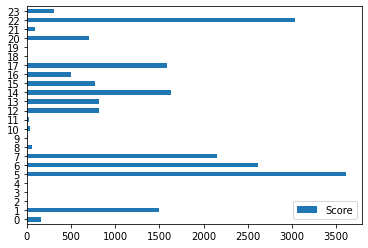

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 85.52728637016877
Test Prediction  85.50789149041702


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  99.83353963037261


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  99.61180412179955


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  99.54360764564495


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  99.83922596717892


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  99.97428497957085


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  99.97408319295063


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
15,packet_count_index,3.863794
1,inport,2.347391
2,cache_coherence_type,1.835452
0,outport,1.677840
9,current_hop,1.538474
6,vc,1.033673
3,flit_id,1.029518
11,enqueue_time,0.136555
4,flit_type,0.006221
8,hop_count,-0.000984


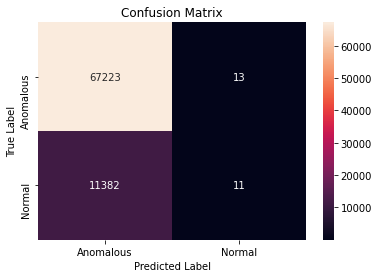

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     67236
           1       0.46      0.00      0.00     11393

    accuracy                           0.86     78629
   macro avg       0.66      0.50      0.46     78629
weighted avg       0.80      0.86      0.79     78629



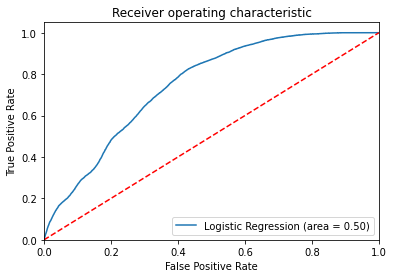

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

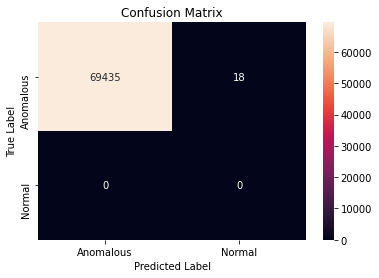

In [0]:
cm = confusion_matrix(test_Y5, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y5, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69453
           1       0.00      0.00      0.00         0

    accuracy                           1.00     69453
   macro avg       0.50      0.50      0.50     69453
weighted avg       1.00      1.00      1.00     69453



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 91.31268361545995
Test Prediction  87.69537956733521


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  95.70048515372687


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  95.71995499894915


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  96.08561291061005


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  95.41866427195434


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  95.47844224120689


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  95.58118439808216


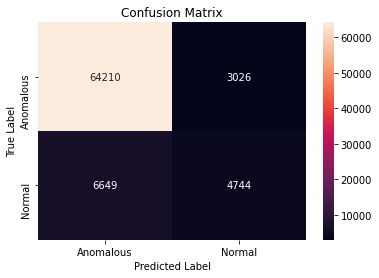

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     67236
           1       0.61      0.42      0.50     11393

    accuracy                           0.88     78629
   macro avg       0.76      0.69      0.71     78629
weighted avg       0.86      0.88      0.87     78629



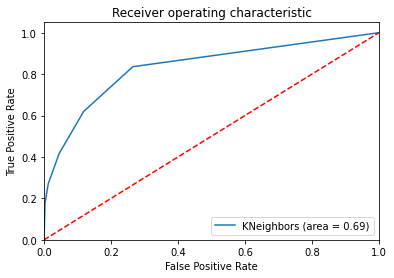

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

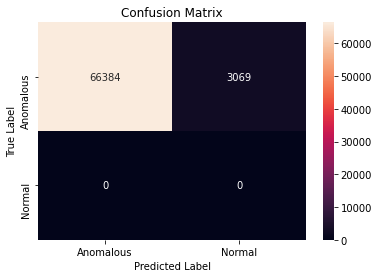

In [0]:
cm = confusion_matrix(test_Y5, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y5,y_pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     69453
           1       0.00      0.00      0.00         0

    accuracy                           0.96     69453
   macro avg       0.50      0.48      0.49     69453
weighted avg       1.00      0.96      0.98     69453



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 33.74518307494691
Test Prediction Score 33.39353164862837


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 39.707200478040036


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  42.12543424777777


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  42.370092709167906


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  34.22314277023798


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  37.285351010028855


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  36.915611996602024


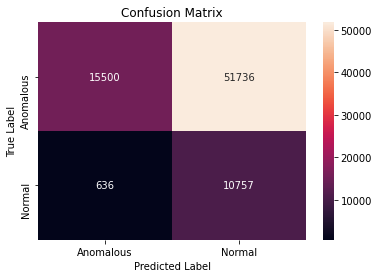

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.96      0.23      0.37     67236
           1       0.17      0.94      0.29     11393

    accuracy                           0.33     78629
   macro avg       0.57      0.59      0.33     78629
weighted avg       0.85      0.33      0.36     78629



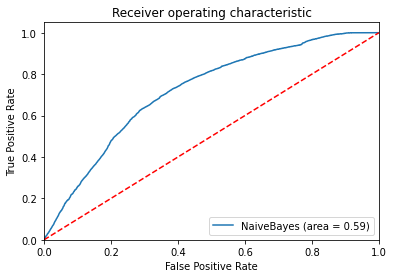

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 251612 samples, validate on 62904 samples
Epoch 1/10
251612/251612 [==============================] - 10s 38us/step - loss: 0.1171 - accuracy: 0.8517 - val_loss: 0.1122 - val_accuracy: 0.8564
Epoch 2/10
251612/251612 [==============================] - 9s 37us/step - loss: 0.1130 - accuracy: 0.8550 - val_loss: 0.1123 - val_accuracy: 0.8566
Epoch 3/10
251612/251612 [==============================] - 9s 37us/step - loss: 0.1128 - accuracy: 0.8550 - val_loss: 0.1117 - val_accuracy: 0.8564
Epoch 4/10
251612/251612 [==============================] - 9s 36us/step - loss: 0.1126 - accuracy: 0.8550 - val_loss: 0.1116 - val_accuracy: 0.8564
Epoch 5/10
251612/251612 [==============================] - 9s 37us/step - loss: 0.1125 - accuracy: 0.8550 - val_loss: 0.1117 - val_accuracy: 0.8566
Epoch 6/10
251612/251612 [==============================] - 9s 37us/step - loss: 0.1124 - accuracy: 0.8550 - val_loss: 0.1114 - val_accuracy: 0.8564
Epoch 7/10
251612/251612 [============================

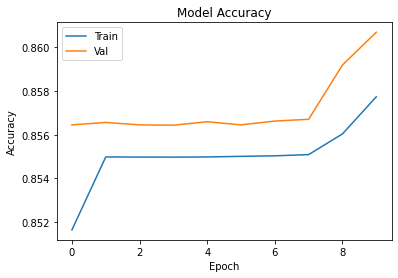

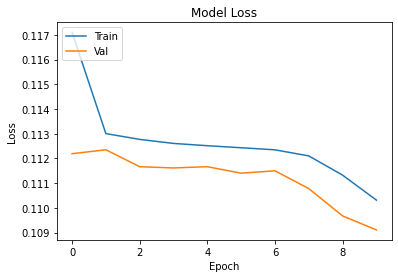

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.92%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 98.01%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 98.09%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.36%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 98.03%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 98.49%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 98.50%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 251612 samples, validate on 62904 samples
Epoch 1/30
251612/251612 [==============================] - 9s 37us/step - loss: 0.1232 - accuracy: 0.8540 - val_loss: 0.1162 - val_accuracy: 0.8564
Epoch 2/30
251612/251612 [==============================] - 9s 37us/step - loss: 0.1160 - accuracy: 0.8550 - val_loss: 0.1141 - val_accuracy: 0.8564
Epoch 3/30
251612/251612 [==============================] - 9s 36us/step - loss: 0.1144 - accuracy: 0.8550 - val_loss: 0.1129 - val_accuracy: 0.8564
Epoch 4/30
251612/251612 [==============================] - 9s 36us/step - loss: 0.1135 - accuracy: 0.8550 - val_loss: 0.1123 - val_accuracy: 0.8564
Epoch 5/30
251612/251612 [==============================] - 10s 38us/step - loss: 0.1130 - accuracy: 0.8550 - val_loss: 0.1119 - val_accuracy: 0.8564
Epoch 6/30
251612/251612 [==============================] - 9s 36us/step - loss: 0.1127 - accuracy: 0.8550 - val_loss: 0.1116 - val_accuracy: 0.8564
Epoch 7/30
251612/251612 [============================

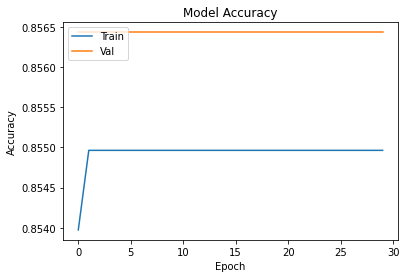

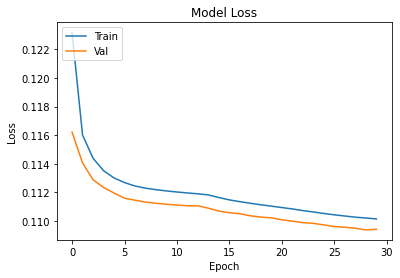

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.51%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 251612 samples, validate on 62904 samples
Epoch 1/30
251612/251612 [==============================] - 9s 36us/step - loss: 0.1321 - accuracy: 0.8531 - val_loss: 0.1230 - val_accuracy: 0.8564
Epoch 2/30
251612/251612 [==============================] - 9s 36us/step - loss: 0.1240 - accuracy: 0.8550 - val_loss: 0.1230 - val_accuracy: 0.8564
Epoch 3/30
251612/251612 [==============================] - 9s 36us/step - loss: 0.1240 - accuracy: 0.8550 - val_loss: 0.1230 - val_accuracy: 0.8564
Epoch 4/30
251612/251612 [==============================] - 9s 36us/step - loss: 0.1240 - accuracy: 0.8550 - val_loss: 0.1230 - val_accuracy: 0.8564
Epoch 5/30
251612/251612 [==============================] - 9s 36us/step - loss: 0.1240 - accuracy: 0.8550 - val_loss: 0.1230 - val_accuracy: 0.8564
Epoch 6/30
251612/251612 [==============================] - 9s 35us/step - loss: 0.1240 - accuracy: 0.8550 - val_loss: 0.1230 - val_accuracy: 0.8564
Epoch 7/30
251612/251612 [=============================

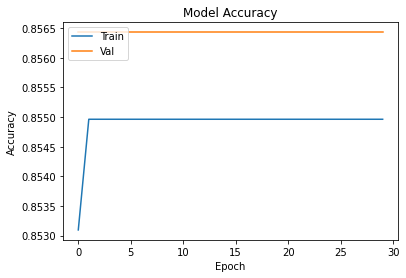

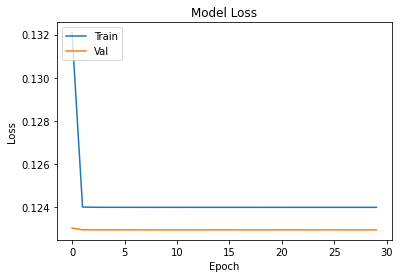

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.51%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 251612 samples, validate on 62904 samples
Epoch 1/100
251612/251612 [==============================] - 19s 74us/step - loss: 0.1110 - accuracy: 0.8547 - val_loss: 0.1049 - val_accuracy: 0.8565
Epoch 2/100
251612/251612 [==============================] - 18s 72us/step - loss: 0.1069 - accuracy: 0.8556 - val_loss: 0.1028 - val_accuracy: 0.8569
Epoch 3/100
251612/251612 [==============================] - 19s 74us/step - loss: 0.1054 - accuracy: 0.8568 - val_loss: 0.1045 - val_accuracy: 0.8574
Epoch 4/100
251612/251612 [==============================] - 19s 75us/step - loss: 0.1046 - accuracy: 0.8573 - val_loss: 0.1005 - val_accuracy: 0.8587
Epoch 5/100
251612/251612 [==============================] - 19s 74us/step - loss: 0.1035 - accuracy: 0.8588 - val_loss: 0.0998 - val_accuracy: 0.8630
Epoch 6/100
251612/251612 [==============================] - 18s 72us/step - loss: 0.1021 - accuracy: 0.8608 - val_loss: 0.0971 - val_accuracy: 0.8684
Epoch 7/100
251612/251612 [================

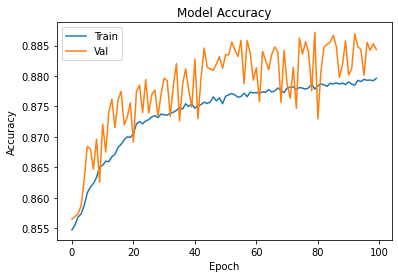

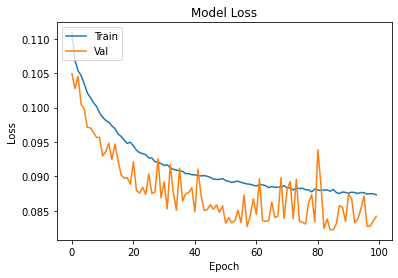

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 88.15%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 96.58%
accuracy: 95.59%
accuracy: 96.29%
accuracy: 96.64%
accuracy: 96.68%
accuracy: 96.72%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 251612 samples, validate on 62904 samples
Epoch 1/50
251612/251612 [==============================] - 19s 74us/step - loss: 0.1112 - accuracy: 0.8548 - val_loss: 0.1067 - val_accuracy: 0.8566
Epoch 2/50
251612/251612 [==============================] - 18s 72us/step - loss: 0.1072 - accuracy: 0.8553 - val_loss: 0.1020 - val_accuracy: 0.8570
Epoch 3/50
251612/251612 [==============================] - 18s 72us/step - loss: 0.1058 - accuracy: 0.8558 - val_loss: 0.1023 - val_accuracy: 0.8575
Epoch 4/50
251612/251612 [==============================] - 18s 71us/step - loss: 0.1047 - accuracy: 0.8570 - val_loss: 0.0994 - val_accuracy: 0.8624
Epoch 5/50
251612/251612 [==============================] - 18s 73us/step - loss: 0.1038 - accuracy: 0.8581 - val_loss: 0.0991 - val_accuracy: 0.8616
Epoch 6/50
251612/251612 [==============================] - 18s 73us/step - loss: 0.1029 - accuracy: 0.8595 - val_loss: 0.0973 - val_accuracy: 0.8694
Epoch 7/50
251612/251612 [=======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 88.03%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.57%
accuracy: 97.40%
accuracy: 97.37%
accuracy: 97.47%
accuracy: 96.87%
accuracy: 96.91%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.73079906904577
Test Prediction Score 94.27056175202534


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 93.3088622362599
Test Prediction Score 92.32756808881526
Test Prediction Score 92.00812635916218
Test Prediction Score 92.35237033067308
Test Prediction Score 92.94551272893511
Test Prediction Score 92.91031344938303


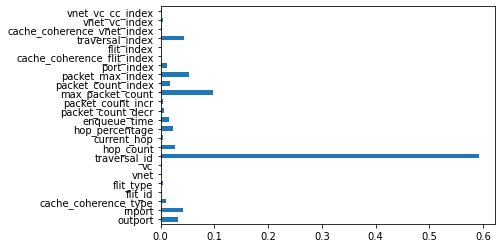

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

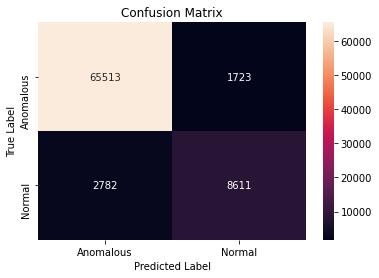

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     67236
           1       0.83      0.76      0.79     11393

    accuracy                           0.94     78629
   macro avg       0.90      0.87      0.88     78629
weighted avg       0.94      0.94      0.94     78629



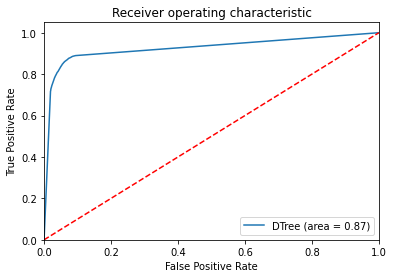

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.16188683564589
Test Prediction Score 95.1341108242506


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 96.17141149857015
Test Prediction Score 95.65814036866246
Test Prediction Score 94.90957994735035
Test Prediction Score 95.34189829231906
Test Prediction Score 95.37986799622846
Test Prediction Score 95.3421738441824


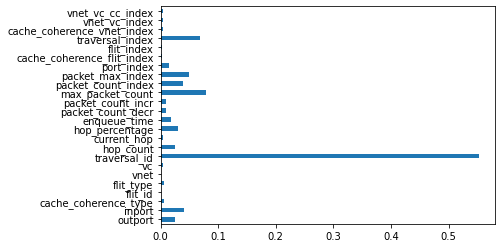

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

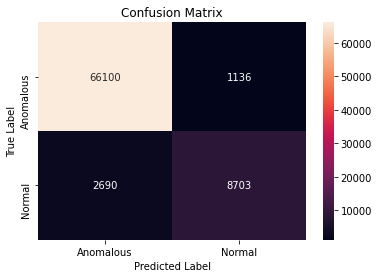

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     67236
           1       0.88      0.76      0.82     11393

    accuracy                           0.95     78629
   macro avg       0.92      0.87      0.90     78629
weighted avg       0.95      0.95      0.95     78629



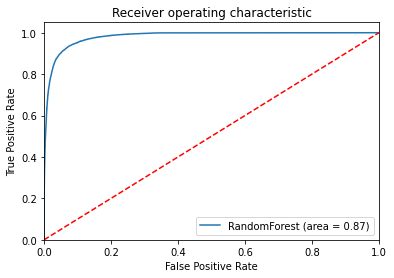

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.73419476274657
Test Prediction Score 96.69460377214514


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 97.43338028369399
Test Prediction Score 99.1840468802156
Test Prediction Score 98.98992789286942
Test Prediction Score 96.89025361741574
Test Prediction Score 95.04842995514157
Test Prediction Score 95.13051991994587


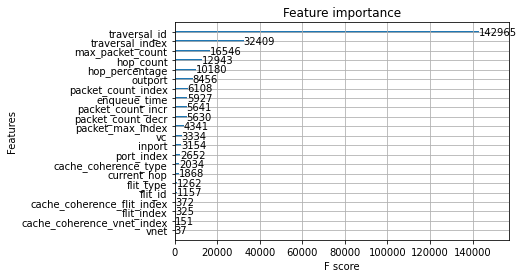

In [0]:
plot_importance(xgbc)
plt.show()

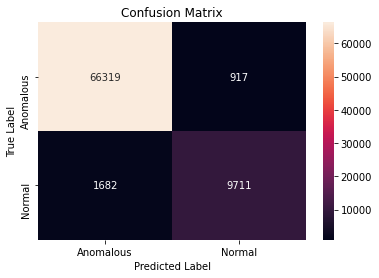

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     67236
           1       0.91      0.85      0.88     11393

    accuracy                           0.97     78629
   macro avg       0.94      0.92      0.93     78629
weighted avg       0.97      0.97      0.97     78629



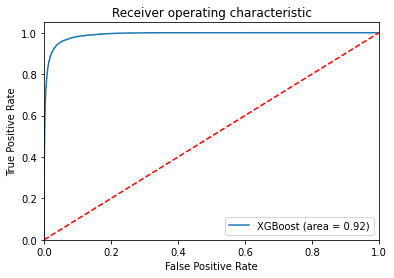

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 92.02043775197446
Test Prediction Score 91.20553485355276


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 97.9896709206539
Test Prediction Score 97.28015626738537
Test Prediction Score 98.10146503376444
Test Prediction Score 98.06202111788647
Test Prediction Score 96.86133889539701
Test Prediction Score 96.61353721221545


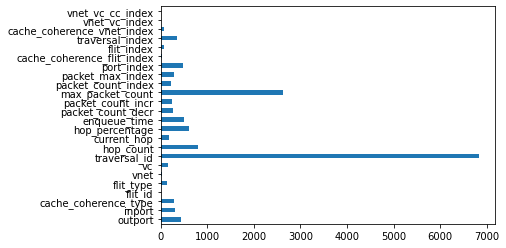

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

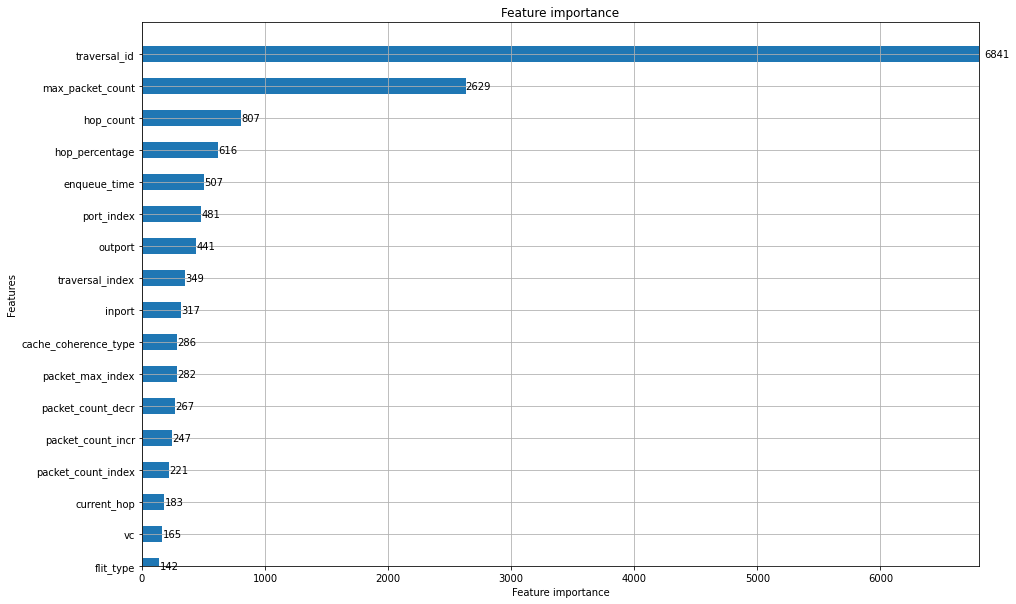

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[6841,
 2629,
 807,
 616,
 507,
 481,
 441,
 349,
 317,
 286,
 282,
 267,
 247,
 221,
 183,
 165,
 142,
 80,
 67,
 37,
 23,
 12,
 0,
 0]

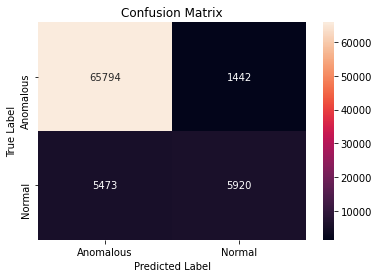

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     67236
           1       0.80      0.52      0.63     11393

    accuracy                           0.91     78629
   macro avg       0.86      0.75      0.79     78629
weighted avg       0.91      0.91      0.90     78629



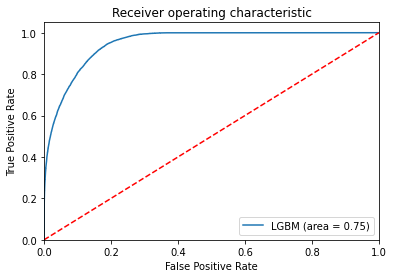

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()